<b> <h1>PROJET DE RECHERCHE</h1></b>


In [1]:
##Uncomment this to install required packages if needed (and restart kernel !)
#! pip install --upgrade pandas
#! pip install --upgrade seaborn
#! pip install --upgrade numpy

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
avis = pd.read_csv('../../PROJET-RECHERCHE/avis.csv')
avis.fillna('', inplace=True)
avis.head()

,author,date_published,title_review,note,review_href,title,url,treated,comment
0,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8,"""https://www.trictrac.net/avis/vraiment-bon-12...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7,"""https://www.trictrac.net/avis/le-festival-de-...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,Comment continuer après un mega hit ? Simpleme...
2,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7,"""https://www.trictrac.net/avis/vivez-la-migrat...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8,,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,
4,prunelles,2021-05-24 12:43:18,Envolez-moi,9,"""https://www.trictrac.net/avis/envolez-moi""",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Très joli bijou que ce jeu-là ! Le matériel, l..."


<h2>Travail sur les auteurs</h2>

In [4]:
nb_auteurs = avis['author'].value_counts()

nb_auteurs.describe()
nb_auteurs

author
PtitJu           1697
limp             1386
morlockbob       1213
Gigi             1078
Govin            1071
                 ... 
Amoeba              1
amarantina          1
RedSean             1
Thybar              1
eric faramond       1
Name: count, Length: 13623, dtype: int64

A vu d'oeil, on voit qu'il y'a en tout 13623 auteurs differents. Un auteur écrit 13 avis en moyenne. L'auteur avec le plus d'avis en a écrit 1697 et on a une variance qui est de 46. 
Dans la suite, nous étudions les différentes tranches d'avis pour mieux comprendre la base de données.

In [5]:
nb_avis_par_auteur = avis['author'].value_counts()

nb_avis_par_auteur_df = pd.DataFrame(nb_avis_par_auteur)

nb_avis_par_auteur_df.describe()

,count
count,13623.000000
mean,12.937165
std,46.143732
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,1697.000000


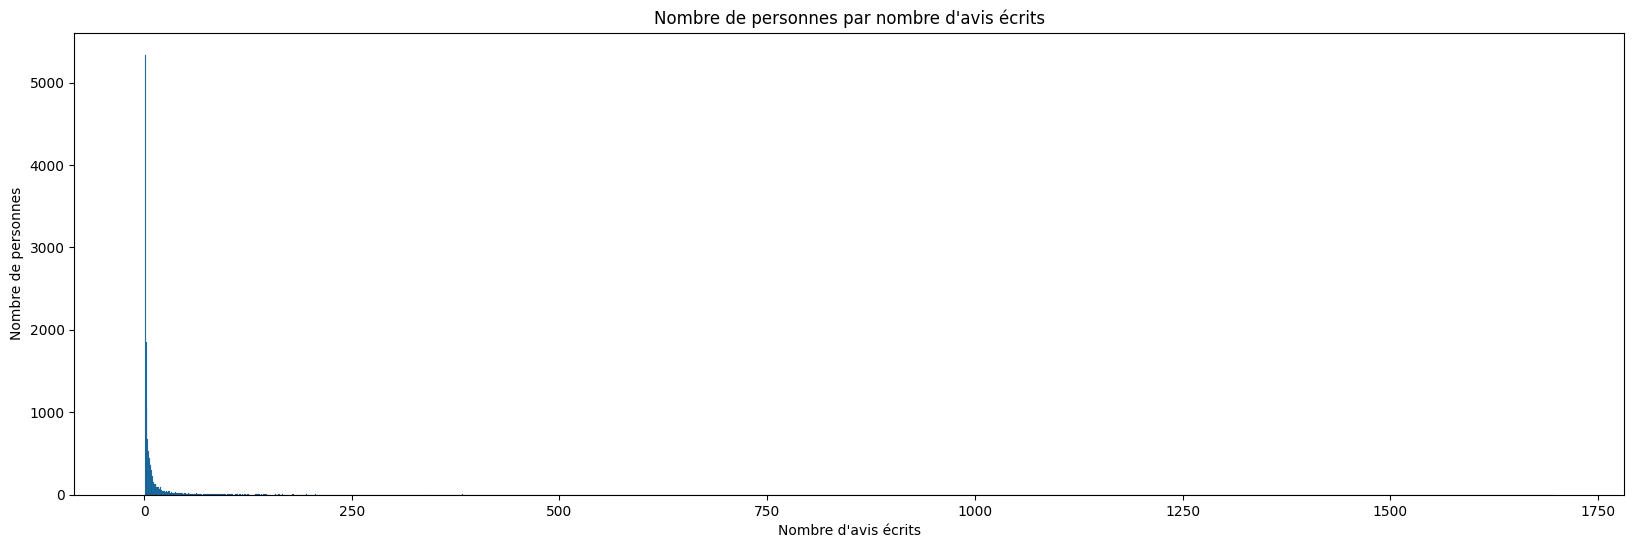

In [6]:
plt.figure(figsize=(20, 6))
sns.histplot(data=nb_avis_par_auteur_df, x='count', binwidth=1, kde=False, alpha=1)
plt.title('Nombre de personnes par nombre d\'avis écrits')
plt.xlabel('Nombre d\'avis écrits')
plt.ylabel('Nombre de personnes')
#plt.yticks(range(0, 6000, 500))
#plt.xticks(range(0, 250, 10))
#plt.xlim(0, 250)
plt.show()

Cet histogramme nous montre que la plupart des auteurs écrivent très peu de commentaires.

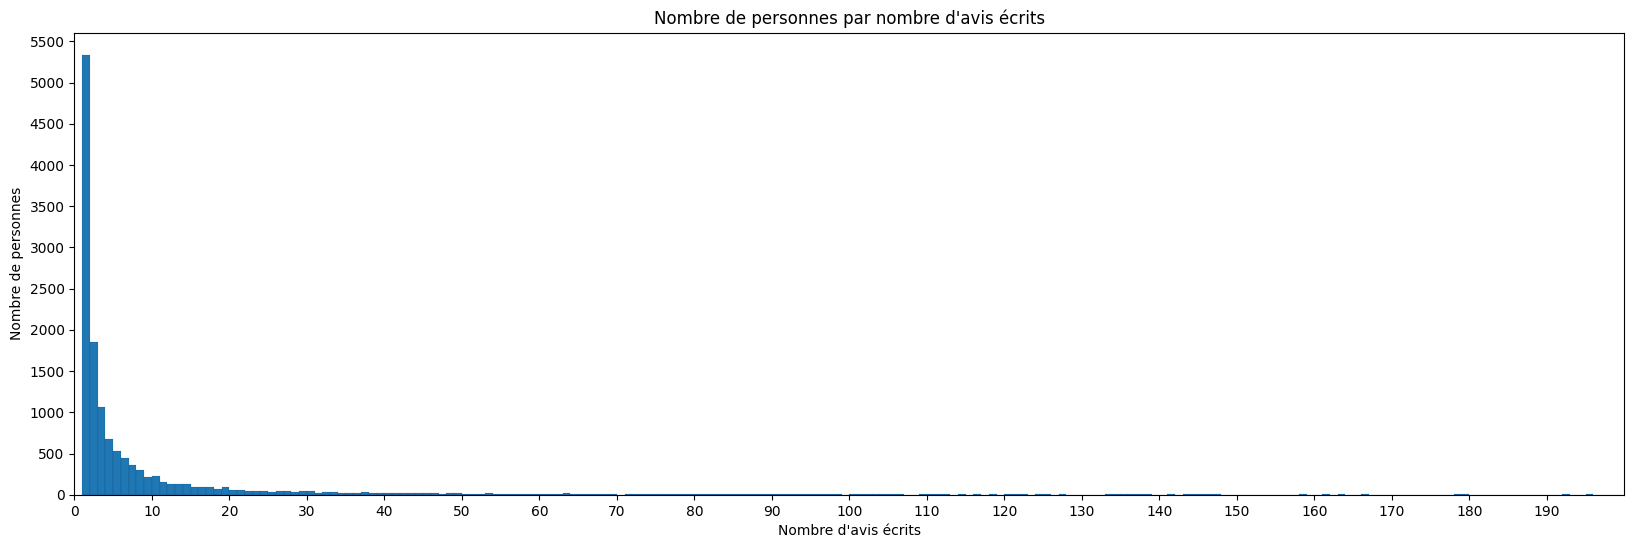

In [7]:
plt.figure(figsize=(20, 6))
sns.histplot(data=nb_avis_par_auteur_df, x='count', binwidth=1, kde=False, alpha=1)
plt.title('Nombre de personnes par nombre d\'avis écrits')
plt.xlabel('Nombre d\'avis écrits')
plt.ylabel('Nombre de personnes')
plt.yticks(range(0, 6000, 500))
plt.xticks(range(0, 200, 10))
plt.xlim(0, 200)
plt.show()

Ici nous avons fait le choix de zoomer sur 250 nombres d'avis écrits afin de mieux visualiser l'histogramme. On remarque que la plupart des auteurs écrivent moins de 40 avis.

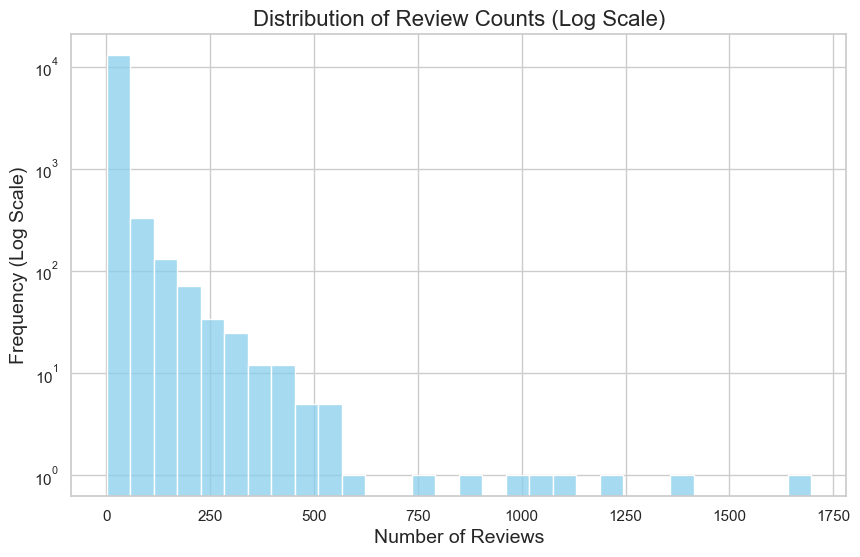

In [8]:
data = pd.read_csv('auteur_avis.csv')

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.histplot(data['count'], bins=30, kde=False, color='skyblue',)
plt.yscale('log')

plt.title('Distribution of Review Counts (Log Scale)', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)

plt.show()

<h2>Travail sur les jeux</h2>

In [9]:
details = pd.read_csv('../../PROJET-RECHERCHE/details_processed.csv')

In [10]:
details = details.drop('casting', axis=1)

details.fillna('', inplace=True)
details.head()

,categories,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel
0,,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74
1,,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68
2,Enchères|Aventures dans la jungle|Collection /...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42
3,,à partir de 1|12 ans et +|~,\n Un Kit de démarrage co...,Alien - Kit de Démarrage (2020),https://www.trictrac.net/jeu-de-societe/alien-...,9.00,4.0,0.00
4,Card-driven|Combinaison|Coopération|Deck build...,1 à 4|12 ans et +|60,\n Le Dr Foo a créé une t...,The LOOP (2020),https://www.trictrac.net/jeu-de-societe/the-loop,8.75,72.0,9.70


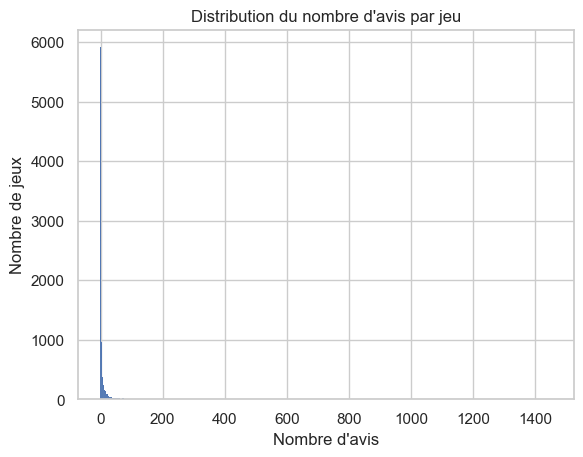

In [11]:
sns.histplot(data=details, x="Nombre d'avis", discrete=True, binwidth=1, alpha = 1)
plt.xlabel('Nombre d\'avis')
plt.ylabel('Nombre de jeux')
plt.title('Distribution du nombre d\'avis par jeu')
plt.show()

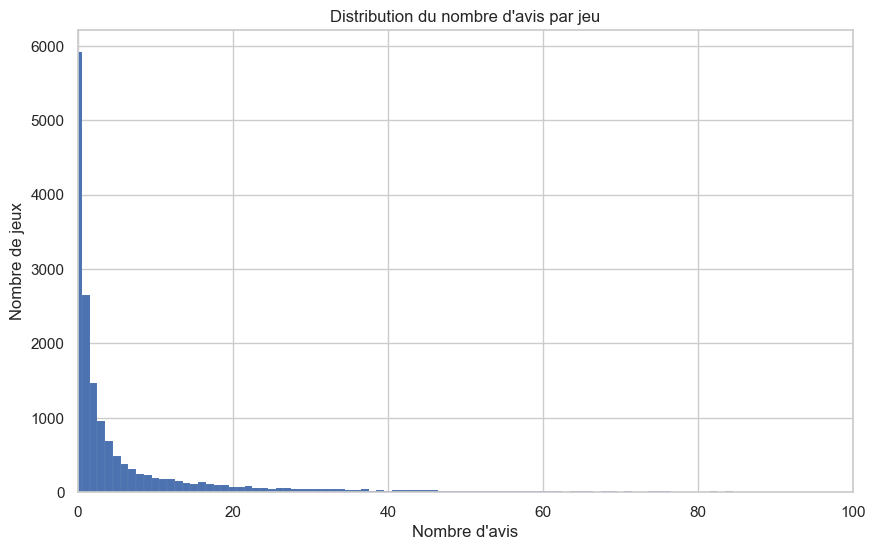

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=details, x="Nombre d'avis", discrete=True, binwidth=1, alpha = 1)
plt.xlabel('Nombre d\'avis')
plt.ylabel('Nombre de jeux')
plt.title('Distribution du nombre d\'avis par jeu')
plt.xlim(0,100)
plt.show()

En zoomant, on remarque que pour les auteurs écrivent en général moins de 20 avis.

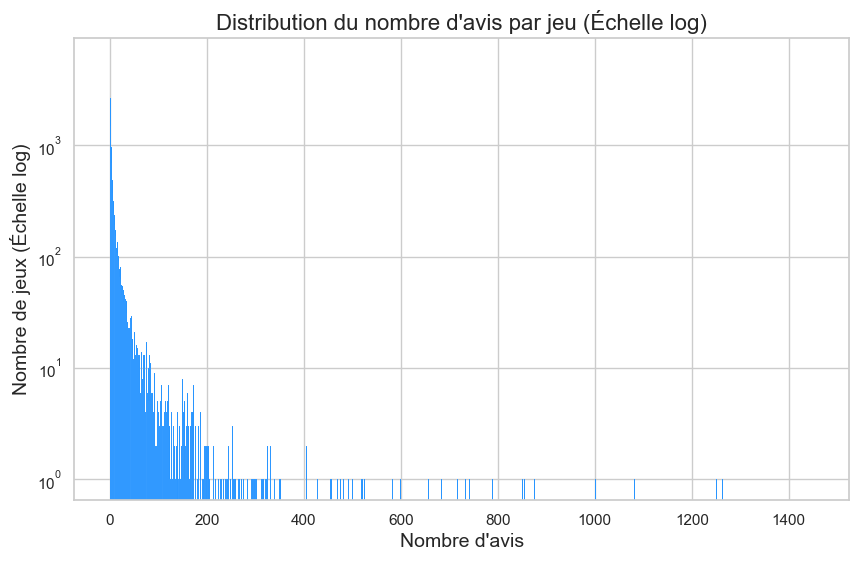

In [13]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=details, x="Nombre d'avis", discrete=True, alpha = 1,bins=30, color='dodgerblue')
plt.yscale('log')


plt.title('Distribution du nombre d\'avis par jeu (Échelle log)', fontsize=16)
plt.xlabel('Nombre d\'avis', fontsize=14)
plt.ylabel('Nombre de jeux (Échelle log)', fontsize=14)

plt.show()

<h4> Travail sur les notes </h4>

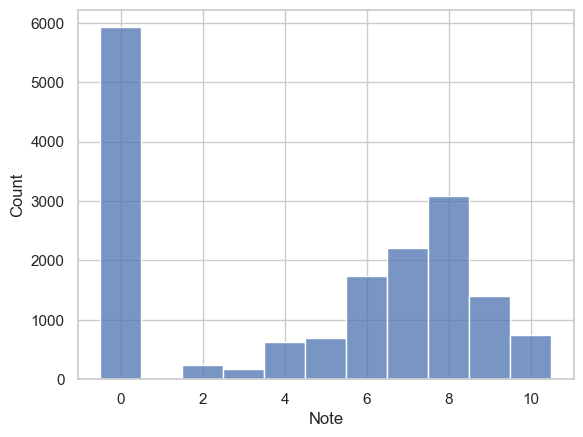

In [14]:
sns.histplot(data=details, x='Note', discrete=True,)
plt.show()

Cet histogramme nous montre que la note la plus attribuée à un jeu est de 0, et inversement il y'a un pic au niveau de la note sur 8. On peut donc supposer que les utilisateurs laissent un avis soit lorsque le jeu ne leur a vraiment pas plu, ou inversement.
On remarque qu'il y'a un creux entre 0 et 6, ce qui appuie notre hypothèse qui dit que les utilisateurs notent les jeux qui les marquent.

<h4>Interessons nous maintenant sur les catégories </h4>

In [15]:
occurrences_par_categorie_df = pd.read_csv('occurrences_par_categorie.csv',)
occurrences_par_categorie_df

,categories,count
0,Jeux de plateau,5081
1,Jeux de cartes,3038
2,NaN,2198
3,Guerre,1564
4,Autres,599
...,...,...
177,Puzzle,1
178,Chat,1
179,Vêtements,1
180,Jeux à gratter,1


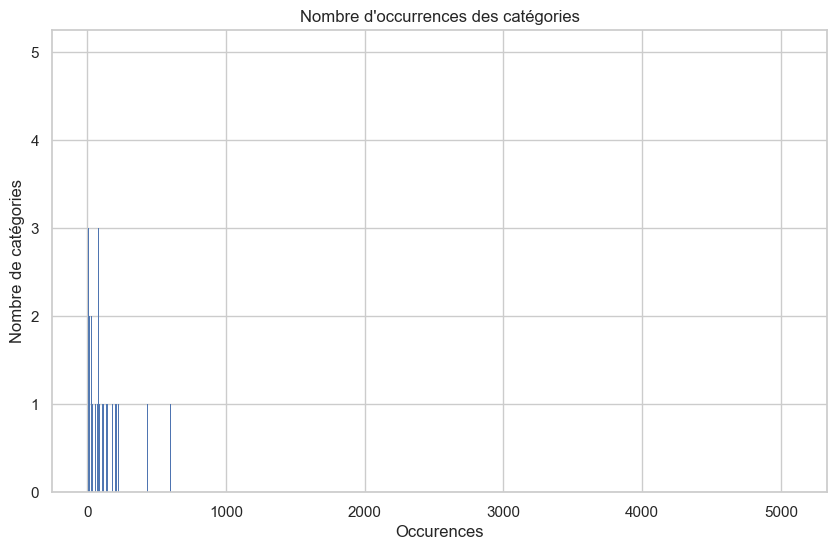

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=occurrences_par_categorie_df, x='count',binwidth=1, alpha = 1)
plt.xlabel('Occurences')
plt.ylabel('Nombre de catégories')
plt.title('Nombre d\'occurrences des catégories')
plt.show()

Ici nous pouvons voir qu'il y'a une concentration sub 1000 au niveau de l'origine. Il y'a cependant une barre au niveau des 5000 qui corresonp à la catégories le avec le plus d'occurences.

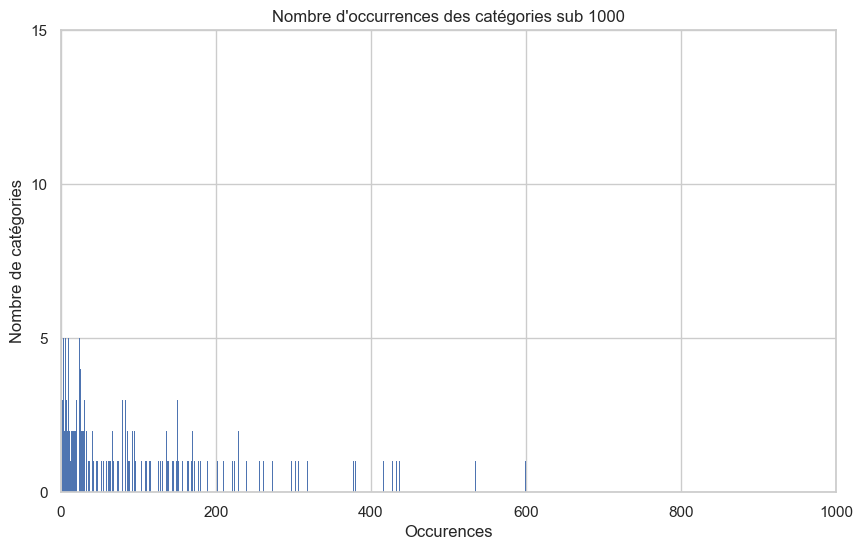

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=occurrences_par_categorie_df, x='count',binwidth=1, alpha = 1)
plt.xlabel('Occurences')
plt.ylabel('Nombre de catégories')
plt.title('Nombre d\'occurrences des catégories sub 1000')
plt.yticks(range(0, 20, 5))
plt.xlim(0,1000)
plt.show()

Ici on décide de zoomer sur les 1000 occurences, on remarque donc bien que la plupart des catégories apparaissent moins de 200 fois.

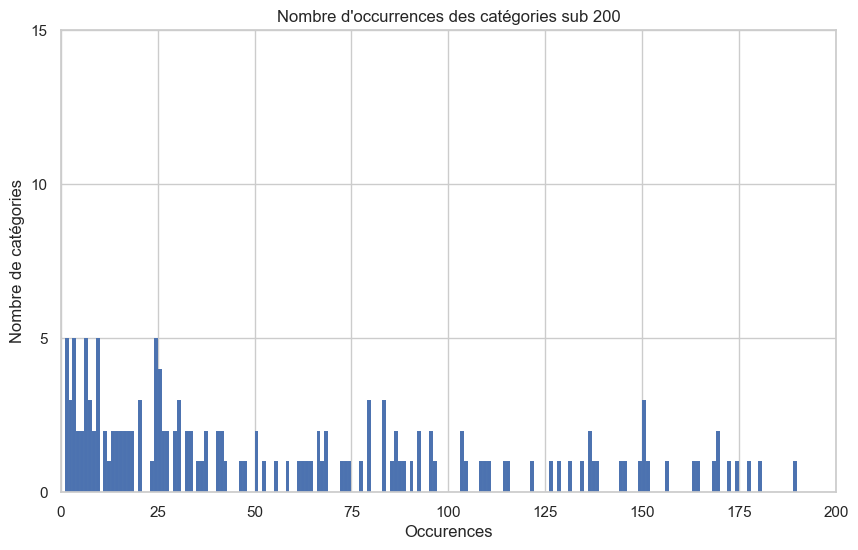

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=occurrences_par_categorie_df, x='count',binwidth=1, alpha = 1)
plt.xlabel('Occurences')
plt.ylabel('Nombre de catégories')
plt.title('Nombre d\'occurrences des catégories sub 200')
plt.yticks(range(0, 20, 5))
plt.xlim(0,200)
plt.show()

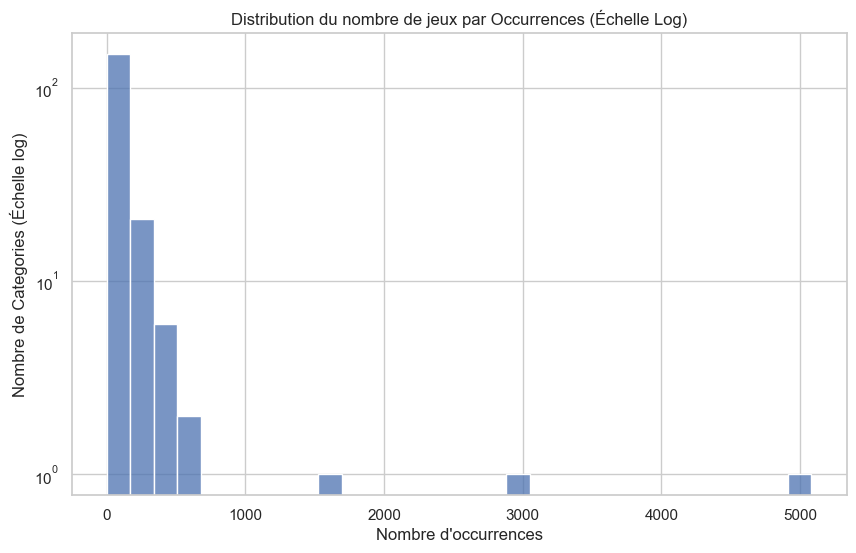

In [34]:
data_cleaned = occurrences_par_categorie_df.dropna(subset=['categories'])

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['count'], bins=30, kde=False)
plt.title('Distribution du nombre de jeux par Occurrences (Échelle Log)')
plt.yscale('log')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Nombre de Categories (Échelle log)')

# Show plot
plt.show()


Cherchons combien y'a-t-il de jeux sans catégories :

In [57]:
nombre_occurrences_categorie_vide = (details_exploded['categories'].isnull() | details_exploded['categories'].eq('')).sum()
nombre_occurrences_categorie_vide

2198

Il y'a 2198 jeux sans catégories.